In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = [
    [0.820, 0.838, 0.874, 0.892, 0.900, 0.900],
    [0.804, 0.834, 0.820, 0.828, 0.846, 0.850],
    [0.800, 0.828, 0.854, 0.874, 0.882, 0.890],
    [0.776, 0.788, 0.856, 0.868, 0.874, 0.890],
    [0.810, 0.840, 0.864, 0.878, 0.874, 0.900],
    [0.810, 0.836, 0.870, 0.868, 0.866, 0.872],
    [0.858, 0.890, 0.874, 0.896, 0.906, 0.904],
    [0.808, 0.828, 0.846, 0.842, 0.840, 0.864],
    [0.748, 0.866, 0.818, 0.860, 0.870, 0.880],
    [0.776, 0.794, 0.852, 0.858, 0.874, 0.892]
]
data = np.array(data)

output_qubits = [3, 4, 5, 6, 7, 8]

classical_runs = [0.780, 0.724, 0.792, 0.756, 0.800, 0.762, 0.778, 0.738, 0.746, 0.792]

In [5]:
import json
import os

path = '../trainings/Dimension_Tests/2_Klassen/'
file_paths = []
classical_paths = []
for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith((".json")):
            print(name)
            if "classical" in name:
                classical_paths.append(os.path.join(root, name))
            else:
                file_paths.append(os.path.join(root, name))

data = np.zeros((len(file_paths)//6,6))
seeds = []

for file_path in file_paths:
    with open(file_path) as json_file:
        results = json.load(json_file)
        if results["seed"] not in seeds:
            seeds.append(results["seed"])
        index = seeds.index(results["seed"])
        
        data[index, results["output_qubits"] - 3]= results["top_acc"]
       
print(data)
print(seeds)

classical_runs = []
for classical_path in classical_paths:
    with open(classical_path) as json_file:
        results = json.load(json_file)
        classical_runs.append(results["top_acc"])

print(classical_runs)

2022-06-09_15-27-45_3.json
2022-06-09_15-27-45_5.json
2022-06-09_15-27-45_8.json
2022-06-09_15-27-45_7.json
2022-06-09_15-27-45_6.json
2022-06-09_15-27-45_4.json
2022-06-09_15-20-03_4.json
2022-06-09_15-20-07_8.json
2022-06-09_15-20-03_7.json
2022-06-09_15-20-03_5.json
2022-06-09_15-20-03_6.json
2022-06-09_15-18-52_3.json
2022-06-09_08-27-12_7.json
2022-06-09_08-27-12_6.json
2022-06-09_08-27-12_8.json
2022-06-09_08-27-12_3.json
2022-06-09_08-27-12_5.json
2022-06-09_08-27-12_4.json
2022-06-09_08-50-15_8.json
2022-06-09_08-50-15_7.json
2022-06-09_08-50-15_5.json
2022-06-09_08-50-15_4.json
2022-06-09_08-49-36_3.json
2022-06-09_08-50-15_6.json
2022-06-09_15-15-15_8.json
2022-06-09_15-15-15_4.json
2022-06-09_15-15-30_5.json
2022-06-09_15-15-15_7.json
2022-06-09_15-15-15_6.json
2022-06-09_15-15-15_3.json
2022-06-09_15-12-31_7.json
2022-06-09_15-12-31_4.json
2022-06-09_15-12-31_3.json
2022-06-09_15-12-31_5.json
2022-06-09_15-12-31_6.json
2022-06-09_15-12-31_8.json
2022-06-09_08-44-32_4.json
2

Text(0, 0.5, 'Max Accuracy')

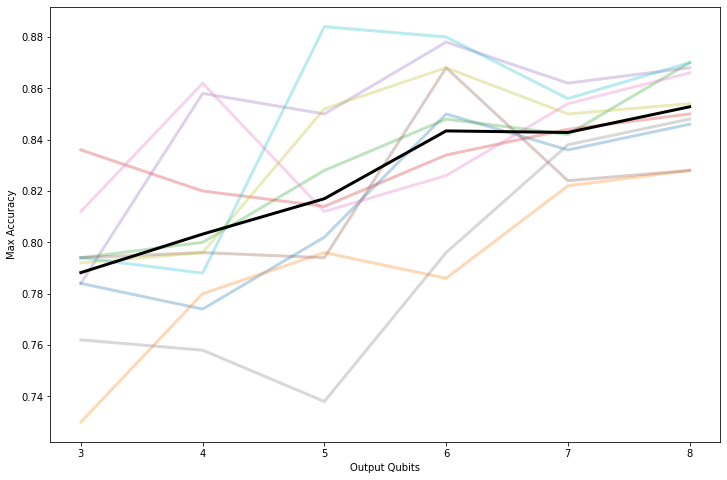

In [6]:
plt.figure(figsize=(12,8))

for i in range(len(data)):
    plt.plot(output_qubits, data[i, :], linewidth=3, alpha=0.3)

plt.plot(output_qubits, np.average(data, axis=0), linewidth=3, color="black")

plt.xlabel("Output Qubits")
plt.ylabel("Max Accuracy")

In [7]:
np.var(data, axis=0)

array([0.00176304, 0.00106244, 0.00057764, 0.00096884, 0.00075844,
       0.00028036])

In [8]:
np.var(classical_runs)

0.0017131600000000018

In [9]:
np.average(classical_runs)

0.6201999999999999